<a href="https://colab.research.google.com/github/odu-cs625-datavis/fall23-mcw-maazhasnainkhan/blob/main/Project/CS_625_Data_Visualization_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Name:</b> Maaz Hasnain Khan

<b>Email:</b> mkhan016@odu.edu

<b>Portfolio:</b> [maazhasnainkhan.github.io](https://maazhasnainkhan.github.io)

#**Project: Global Influenza Programme (FluNet) - Understanding Global Influenza Dynamics**

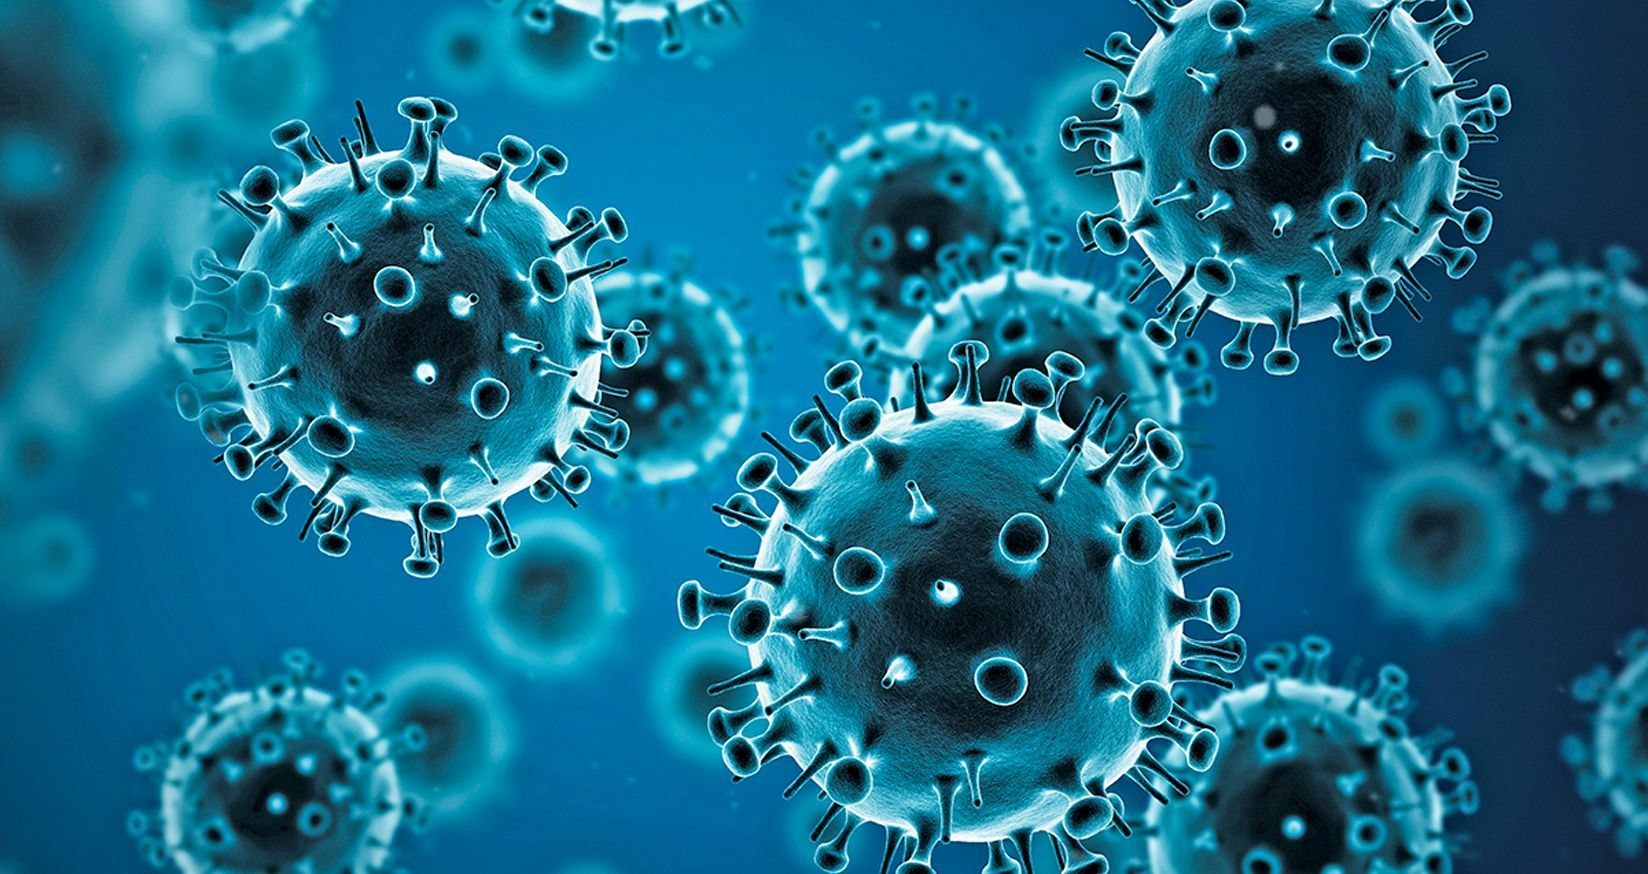

##**Raw Dataset**

[Global Influenza Programme - FluNet](https://www.who.int/tools/flunet)

In [ ]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount("/content/drive", force_remount = True)

# Read the CSV file into a DataFrame
influenza_df = pd.read_csv("/content/drive/MyDrive/CS_620/CS_620_Data_Project/VIW_FNT.csv")
influenza_df.head()

Mounted at /content/drive


,WHOREGION,FLUSEASON,HEMISPHERE,ITZ,COUNTRY_CODE,COUNTRY_AREA_TERRITORY,ISO_WEEKSTARTDATE,ISO_YEAR,ISO_WEEK,MMWR_WEEKSTARTDATE,...,PARAINFLUENZA,RHINO,RSV,OTHERRESPVIRUS,OTHER_RESPVIRUS_DETAILS,LAB_RESULT_COMMENT,WCR_COMMENT,ISO2,ISOYW,MMWRYW
0,AMR,YR,NH,FLU_CNT_AMC,PAN,Panama,2007-12-03,2007,49,2007-12-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,200749,200749
1,EMR,YR,NH,FLU_WST_ASIA,LBN,Lebanon,2022-02-07,2022,6,2022-02-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LB,202206,202206
2,WPR,YR,NH,FLU_SE_ASIA,PHL,Philippines,2016-05-30,2016,22,2016-05-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PH,201622,201622
3,WPR,SH,SH,FLU_OCE_MEL_POL,AUS,Australia,2009-07-20,2009,30,2009-07-19,...,NaN,NaN,NaN,NaN,"PIV-2,3; RSV",NaN,NaN,AU,200930,200930
4,AMR,YR,SH,FLU_TRP_SAMR,ECU,Ecuador,2021-05-10,2021,19,2021-05-09,...,1.0,NaN,4.0,NaN,NaN,NaN,NaN,EC,202119,202119


# **Data Wrangling / Cleaning**

## Handling Null Values

In [ ]:
# List of columns to replace null values with 0
columns_to_replace_null = [
    'AH1N12009', 'AH1', 'AH3', 'AH5', 'AH7N9',
    'ANOTSUBTYPED', 'ANOTSUBTYPABLE', 'AOTHER_SUBTYPE', 'AOTHER_SUBTYPE_DETAILS',
    'INF_A', 'BVIC_2DEL', 'BVIC_3DEL', 'BVIC_NODEL', 'BVIC_DELUNK',
    'BYAM', 'BNOTDETERMINED', 'INF_B', 'INF_ALL', 'INF_NEGATIVE',
    'ILI_ACTIVITY', 'ADENO', 'BOCA', 'HUMAN_CORONA', 'METAPNEUMO',
    'PARAINFLUENZA', 'RHINO', 'RSV', 'OTHERRESPVIRUS'
]

# Replace null values with 0 in the specified columns
influenza_df[columns_to_replace_null] = influenza_df[columns_to_replace_null].fillna(0)
influenza_df.head()

,WHOREGION,FLUSEASON,HEMISPHERE,ITZ,COUNTRY_CODE,COUNTRY_AREA_TERRITORY,ISO_WEEKSTARTDATE,ISO_YEAR,ISO_WEEK,MMWR_WEEKSTARTDATE,...,PARAINFLUENZA,RHINO,RSV,OTHERRESPVIRUS,OTHER_RESPVIRUS_DETAILS,LAB_RESULT_COMMENT,WCR_COMMENT,ISO2,ISOYW,MMWRYW
0,AMR,YR,NH,FLU_CNT_AMC,PAN,Panama,2007-12-03,2007,49,2007-12-02,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,PA,200749,200749
1,EMR,YR,NH,FLU_WST_ASIA,LBN,Lebanon,2022-02-07,2022,6,2022-02-06,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,LB,202206,202206
2,WPR,YR,NH,FLU_SE_ASIA,PHL,Philippines,2016-05-30,2016,22,2016-05-29,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,PH,201622,201622
3,WPR,SH,SH,FLU_OCE_MEL_POL,AUS,Australia,2009-07-20,2009,30,2009-07-19,...,0.0,0.0,0.0,0.0,"PIV-2,3; RSV",NaN,NaN,AU,200930,200930
4,AMR,YR,SH,FLU_TRP_SAMR,ECU,Ecuador,2021-05-10,2021,19,2021-05-09,...,1.0,0.0,4.0,0.0,NaN,NaN,NaN,EC,202119,202119


## Removing Unnecessary Columns

In [ ]:
# List of columns to remove
columns_to_remove = ['ITZ', 'MMWR_WEEKSTARTDATE', 'MMWR_YEAR', 'MMWR_WEEK', 'ORIGIN_SOURCE', 'SPEC_RECEIVED_NB', 'AOTHER_SUBTYPE_DETAILS', 'ILI_ACTIVITY', 'ADENO', 'BOCA', 'HUMAN_CORONA', 'METAPNEUMO', 'PARAINFLUENZA', 'RHINO', 'RSV', 'OTHERRESPVIRUS','OTHER_RESPVIRUS_DETAILS', 'LAB_RESULT_COMMENT', 'WCR_COMMENT', 'ISO2', 'ISOYW', 'MMWRYW']
# Drop the specified columns
influenza_df = influenza_df.drop(columns=columns_to_remove)

influenza_df.head()

,WHOREGION,FLUSEASON,HEMISPHERE,COUNTRY_CODE,COUNTRY_AREA_TERRITORY,ISO_WEEKSTARTDATE,ISO_YEAR,ISO_WEEK,SPEC_PROCESSED_NB,AH1N12009,...,INF_A,BVIC_2DEL,BVIC_3DEL,BVIC_NODEL,BVIC_DELUNK,BYAM,BNOTDETERMINED,INF_B,INF_ALL,INF_NEGATIVE
0,AMR,YR,NH,PAN,Panama,2007-12-03,2007,49,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,EMR,YR,NH,LBN,Lebanon,2022-02-07,2022,6,434.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,433.0
2,WPR,YR,NH,PHL,Philippines,2016-05-30,2016,22,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,WPR,SH,SH,AUS,Australia,2009-07-20,2009,30,2155.0,751.0,...,841.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,841.0,0.0
4,AMR,YR,SH,ECU,Ecuador,2021-05-10,2021,19,68.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0


## Converting Values in Columns With Influenza Data to Numbers

In [ ]:
# List of columns to convert to numbers
columns_to_convert = [
    'SPEC_PROCESSED_NB', 'AH1N12009', 'AH1', 'AH3', 'AH5', 'AH7N9',
    'ANOTSUBTYPED', 'ANOTSUBTYPABLE', 'AOTHER_SUBTYPE', 'INF_A', 'BVIC_2DEL', 'BVIC_3DEL', 'BVIC_NODEL', 'BVIC_DELUNK',
    'BYAM', 'BNOTDETERMINED', 'INF_B', 'INF_ALL', 'INF_NEGATIVE',

]

# Convert the values in the specified columns to numbers
influenza_df[columns_to_convert] = influenza_df[columns_to_convert].apply(pd.to_numeric)


## Remove Rows with Null Values in the 'Specimen Processed for Influenza' Column

In [ ]:
# Remove rows with null values in the "SPEC_PROCESSED_NB" column
influenza_df = influenza_df.dropna(subset=['SPEC_PROCESSED_NB'])

print(influenza_df)

       WHOREGION FLUSEASON HEMISPHERE COUNTRY_CODE COUNTRY_AREA_TERRITORY  \
0            AMR        YR         NH          PAN                 Panama   
1            EMR        YR         NH          LBN                Lebanon   
2            WPR        YR         NH          PHL            Philippines   
3            WPR        SH         SH          AUS              Australia   
4            AMR        YR         SH          ECU                Ecuador   
...          ...       ...        ...          ...                    ...   
147287      SEAR        YR         NH          THA               Thailand   
147288       EUR        NH         NH          ROU                Romania   
147289       EUR        NH         NH          CZE                Czechia   
147290       EUR        NH         NH          CHE            Switzerland   
147291      SEAR        YR         NH          IND                  India   

       ISO_WEEKSTARTDATE  ISO_YEAR  ISO_WEEK  SPEC_PROCESSED_NB  AH1N12009 

## Data Filtering and Validation Steps

In [ ]:
# List of columns to calculate the sum
columns_to_sum = [
    'INF_ALL', 'INF_NEGATIVE'
]

# Calculate the sum of values in the specified columns for each row
sum_of_columns = influenza_df[columns_to_sum].sum(axis=1)

# Filter the DataFrame to keep rows where the sum is equal to "SPEC_PROCESSED_NB"
influenza_df = influenza_df[sum_of_columns == influenza_df["SPEC_PROCESSED_NB"]]

# Calculate the sum of values in the first set of columns for each row
sum_columns_set1 = influenza_df[['AH1N12009', 'AH1', 'AH3', 'AH5', 'AH7N9', 'ANOTSUBTYPED', 'ANOTSUBTYPABLE', 'AOTHER_SUBTYPE']].sum(axis=1)

# Calculate the sum of values in the second set of columns for each row
sum_columns_set2 = influenza_df[['BVIC_2DEL', 'BVIC_3DEL', 'BVIC_NODEL', 'BVIC_DELUNK', 'BYAM', 'BNOTDETERMINED']].sum(axis=1)

# Compare the sums to the corresponding columns and filter the DataFrame
influenza_df = influenza_df[(sum_columns_set1 == influenza_df['INF_A']) & (sum_columns_set2 == influenza_df['INF_B'])]

# Calculate the sum of "INF_A" and "INF_B" columns for each row
sum_inf_a_b = influenza_df["INF_A"] + influenza_df["INF_B"]

# Filter the DataFrame to keep rows where the sum is equal to "INF_ALL"
influenza_df = influenza_df[sum_inf_a_b == influenza_df["INF_ALL"]]

# Filter rows where SPEC_PROCESSED_NB is not equal to 0
influenza_df = influenza_df[influenza_df['SPEC_PROCESSED_NB'] != 0]

print(influenza_df)


       WHOREGION FLUSEASON HEMISPHERE COUNTRY_CODE COUNTRY_AREA_TERRITORY  \
4            AMR        YR         SH          ECU                Ecuador   
7           SEAR        YR         NH          NPL                  Nepal   
9            AMR        SH         SH          CHL                  Chile   
10           WPR        SH         SH          FJI                   Fiji   
13          SEAR        YR         NH          NPL                  Nepal   
...          ...       ...        ...          ...                    ...   
147251       AFR        YR         NH          NER                  Niger   
147259       AMR        YR         NH          HTI                  Haiti   
147268       WPR        SH         SH          AUS              Australia   
147277       WPR        SH         SH          FJI                   Fiji   
147283       EMR        YR         NH          BHR                Bahrain   

       ISO_WEEKSTARTDATE  ISO_YEAR  ISO_WEEK  SPEC_PROCESSED_NB  AH1N12009 

# **Data Visualization**

<ipython-input-12-9c19c4bafc1c>:28: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 1, 1)


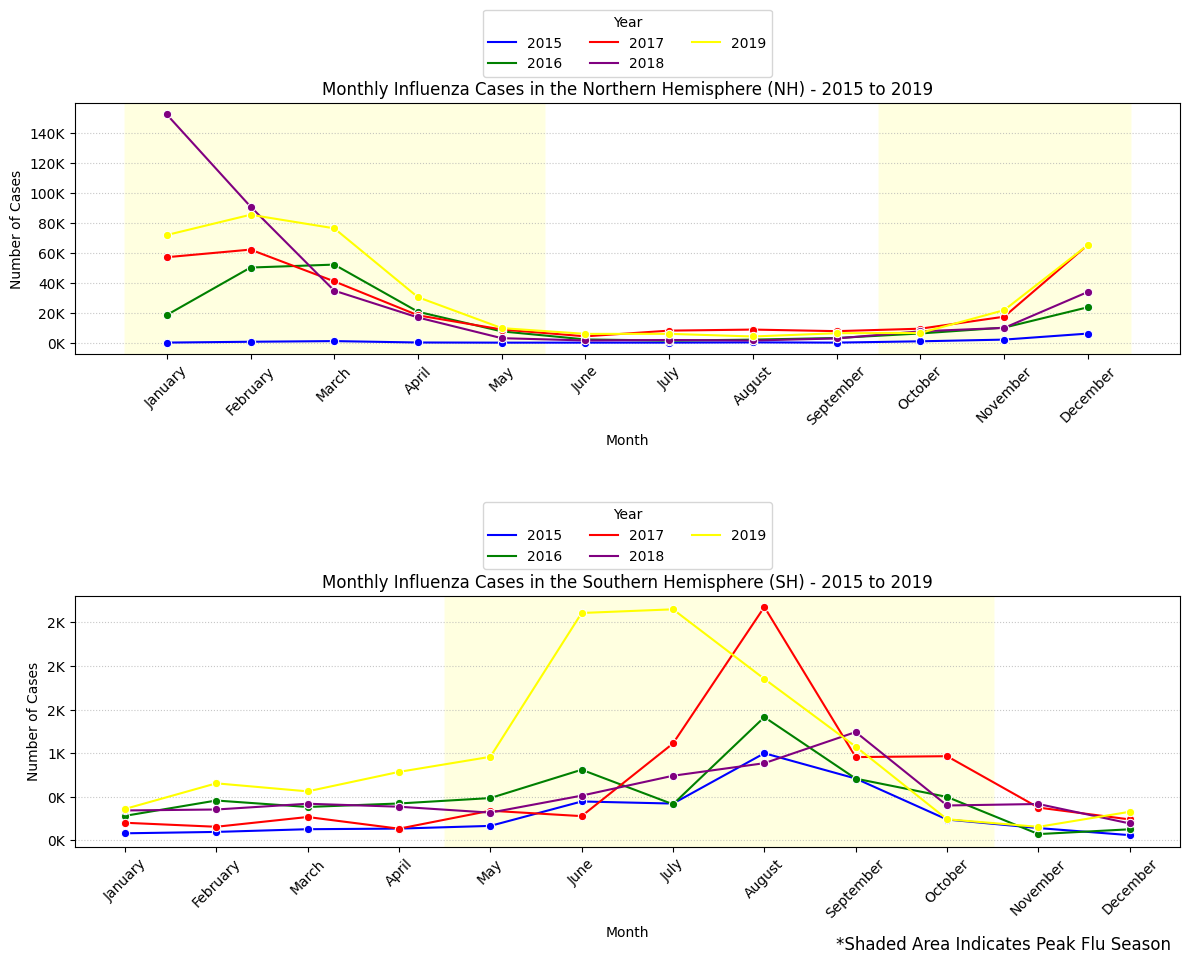

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def format_yaxis_labels(value, _):
    return "{:,.0f}K".format(value / 1000)

influenza_df['ISO_WEEKSTARTDATE'] = pd.to_datetime(influenza_df['ISO_WEEKSTARTDATE'])

years_to_plot = [2015, 2016, 2017, 2018, 2019]  # Include 2015-2019 for the average
filtered_df = influenza_df[influenza_df['ISO_YEAR'].isin(years_to_plot)].copy()

filtered_df['Month'] = filtered_df['ISO_WEEKSTARTDATE'].dt.month_name()
filtered_df['Year'] = filtered_df['ISO_YEAR']

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
filtered_df['Month'] = pd.Categorical(filtered_df['Month'], categories=month_order, ordered=True)

line_colors = ['blue', 'green', 'red', 'purple', 'yellow']

plt.figure(figsize=(12, 10))

agg_df = filtered_df.groupby(['HEMISPHERE', 'Year', 'Month']).agg({'INF_ALL': 'sum'}).reset_index()

avg_df = filtered_df[filtered_df['ISO_YEAR'].isin(range(2015, 2020))].groupby(['HEMISPHERE', 'Month']).agg({'INF_ALL': 'mean'}).reset_index()
sns.lineplot(x='Month', y='INF_ALL', hue='HEMISPHERE', data=avg_df, marker='o', color='black', linestyle='--', label='2015-2019 Avg')

plt.subplot(2, 1, 1)
sns.lineplot(x='Month', y='INF_ALL', hue='Year', data=agg_df[agg_df['HEMISPHERE'] == 'NH'], marker='o', palette=line_colors)
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Monthly Influenza Cases in the Northern Hemisphere (NH) - 2015 to 2019')
plt.xticks(rotation=45)
plt.legend(title="Year", loc="upper center", bbox_to_anchor=(0.5, 1.40), ncol=3)

for year in years_to_plot:
    flu_season_months = ['October', 'November', 'December', 'January', 'February', 'March', 'April', 'May']
    for month in flu_season_months:
        plt.axvspan(month_order.index(month) - 0.5, month_order.index(month) + 0.5, color='lightyellow', alpha=0.5)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(format_yaxis_labels))

plt.grid(axis='y', linestyle='dotted', alpha=0.7)

plt.subplot(2, 1, 2)
sns.lineplot(x='Month', y='INF_ALL', hue='Year', data=agg_df[agg_df['HEMISPHERE'] == 'SH'], marker='o', palette=line_colors)
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Monthly Influenza Cases in the Southern Hemisphere (SH) - 2015 to 2019')
plt.xticks(rotation=45)
plt.legend(title="Year", loc="upper center", bbox_to_anchor=(0.5, 1.40), ncol=3)

for year in years_to_plot:
    flu_season_months = ['May', 'June', 'July', 'August', 'September', 'October']
    for month in flu_season_months:
        plt.axvspan(month_order.index(month) - 0.5, month_order.index(month) + 0.5, color='lightyellow', alpha=0.5)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(format_yaxis_labels))

plt.grid(axis='y', linestyle='dotted', alpha=0.7)

plt.tight_layout()

plt.figtext(0.84, 0.01, '*Shaded Area Indicates Peak Flu Season', ha='center', va='center', fontsize=12, color='black')

plt.show()


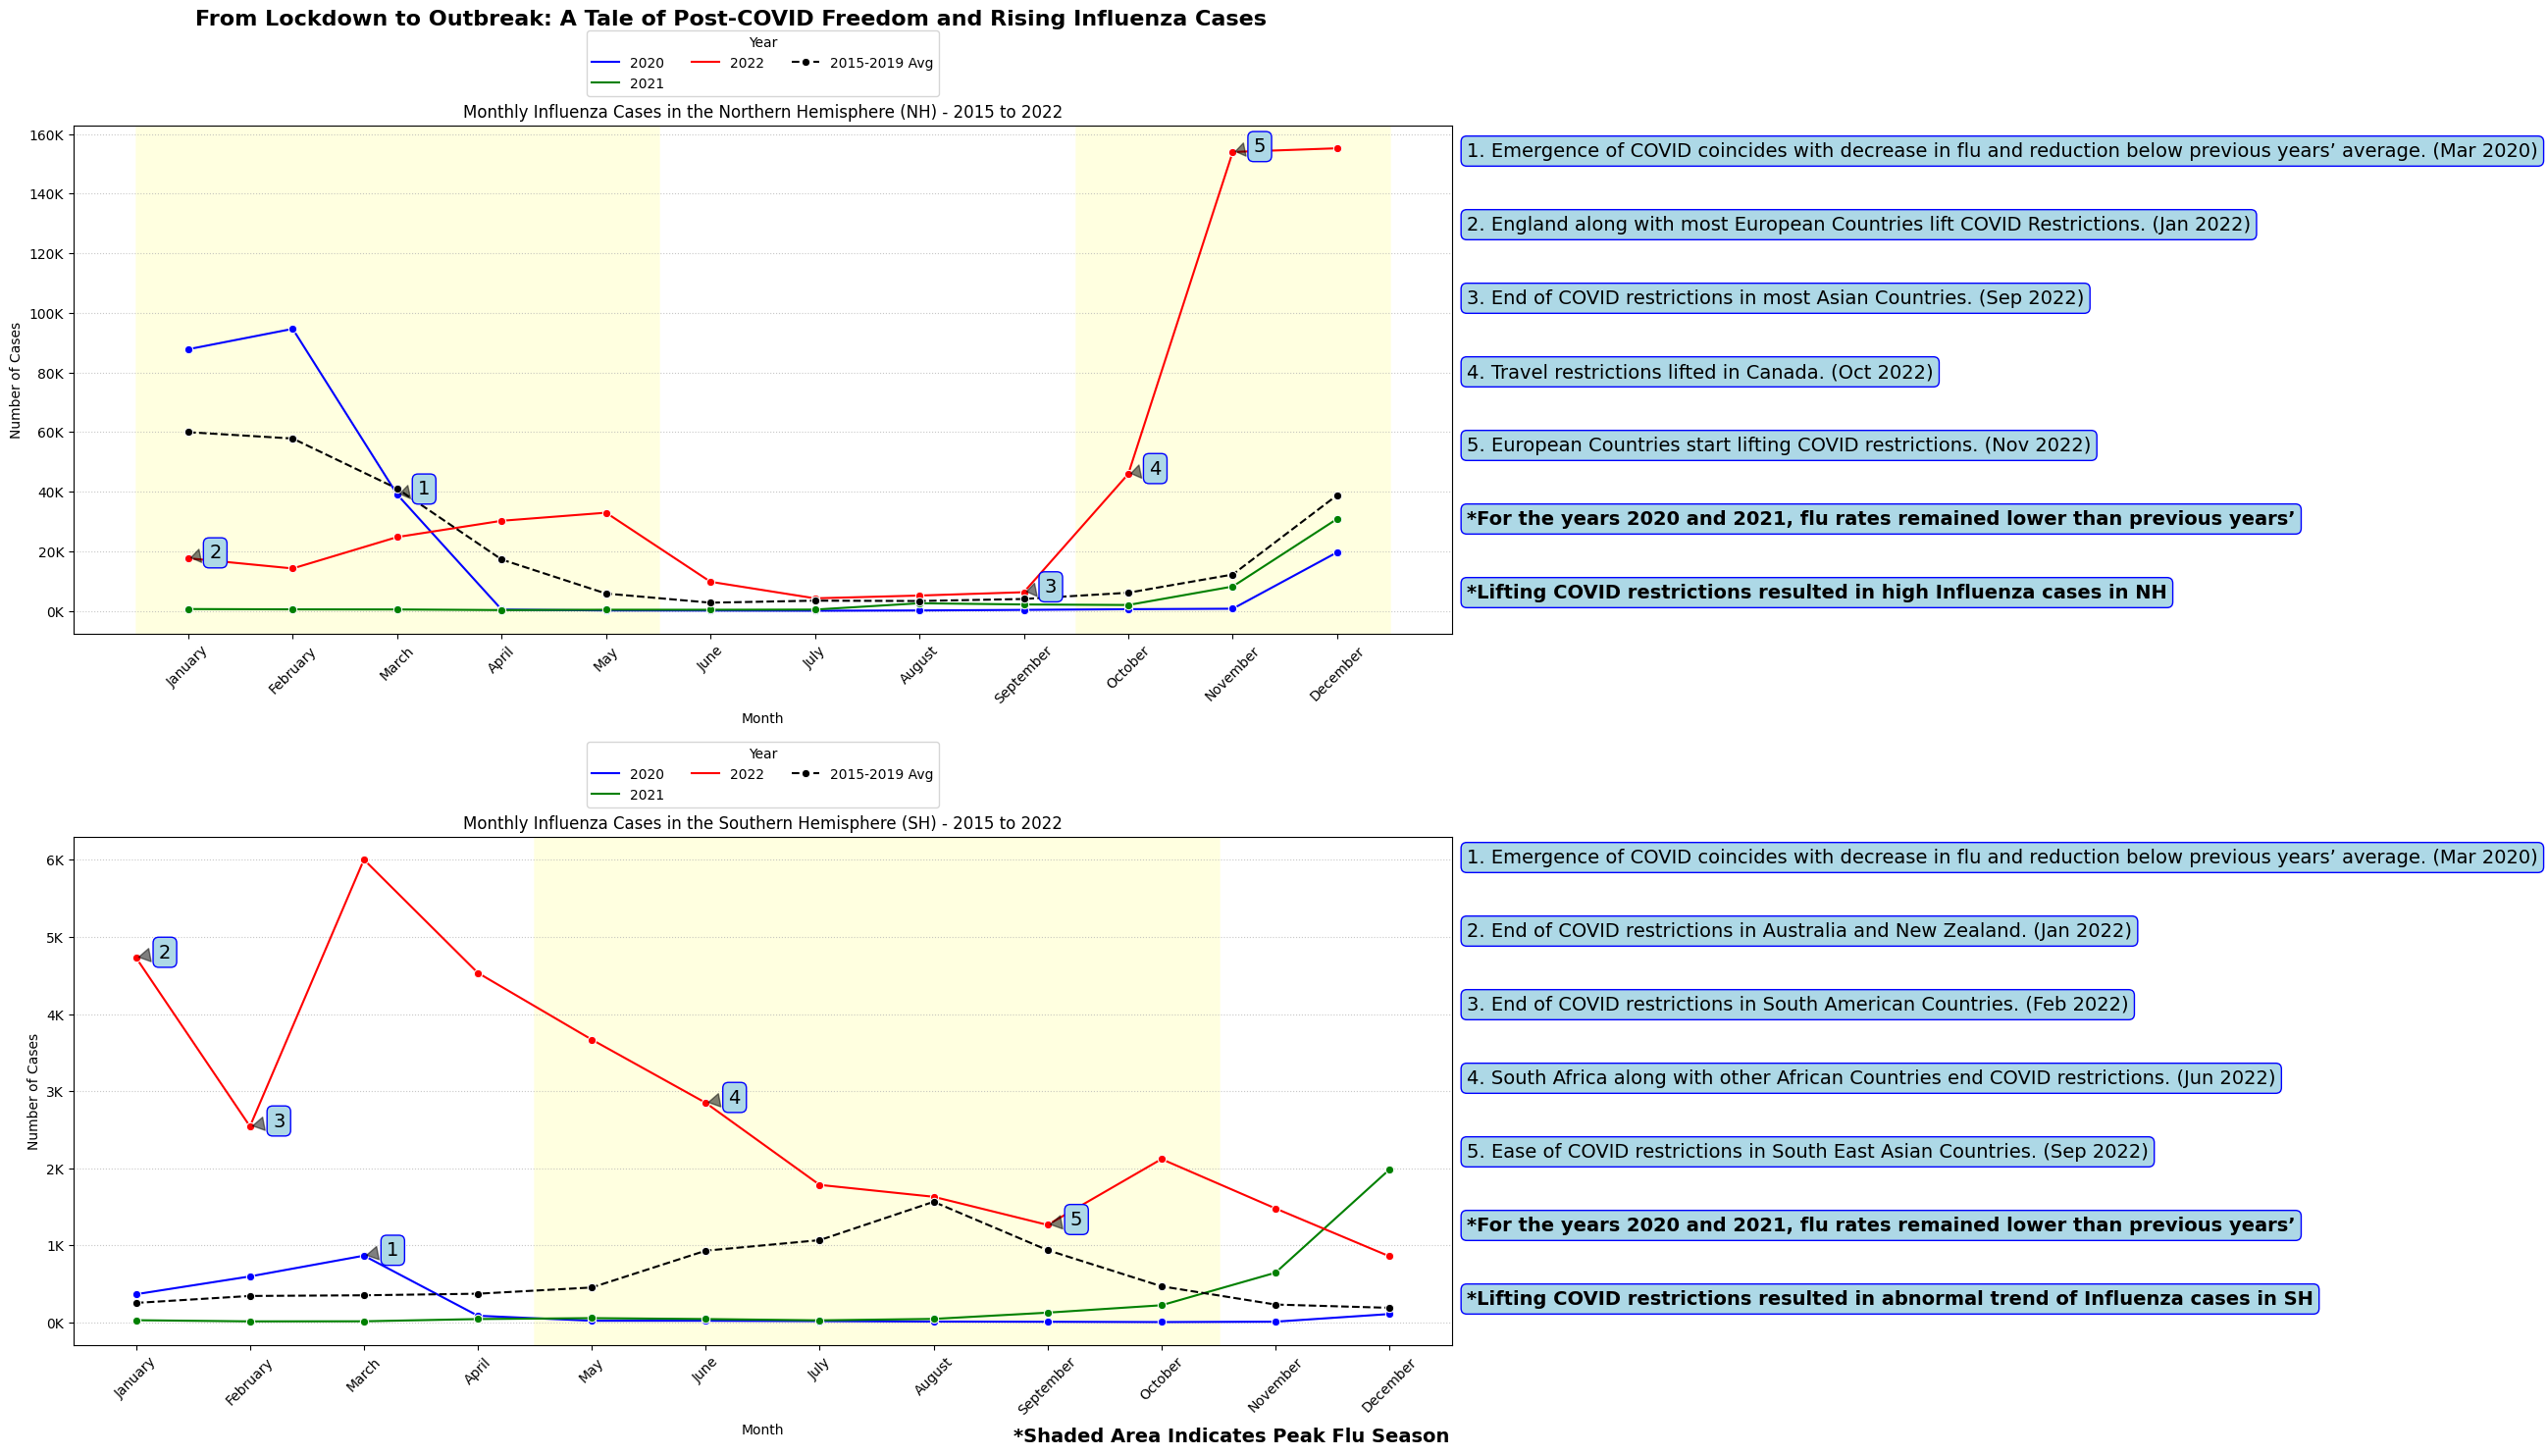

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def format_yaxis_labels(value, _):
    return "{:,.0f}K".format(value / 1000)

influenza_df['ISO_WEEKSTARTDATE'] = pd.to_datetime(influenza_df['ISO_WEEKSTARTDATE'])

years_to_plot = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
filtered_df = influenza_df[influenza_df['ISO_YEAR'].isin(years_to_plot)].copy()

filtered_df['Month'] = filtered_df['ISO_WEEKSTARTDATE'].dt.month_name()
filtered_df['Year'] = filtered_df['ISO_YEAR']

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
filtered_df['Month'] = pd.Categorical(filtered_df['Month'], categories=month_order, ordered=True)

line_colors = ['blue', 'green', 'red']

plt.figure(figsize=(15, 15))

agg_df = filtered_df.groupby(['HEMISPHERE', 'Year', 'Month']).agg({'INF_ALL': 'sum'}).reset_index()

avg_df_nh = agg_df[(agg_df['HEMISPHERE'] == 'NH') & (agg_df['Year'].isin([2015, 2016, 2017, 2018, 2019]))].groupby(['Month']).agg({'INF_ALL': 'mean'}).reset_index()
avg_df_sh = agg_df[(agg_df['HEMISPHERE'] == 'SH') & (agg_df['Year'].isin([2015, 2016, 2017, 2018, 2019]))].groupby(['Month']).agg({'INF_ALL': 'mean'}).reset_index()

nh_annotations = [
    ("1. Emergence of COVID coincides with decrease in flu and reduction below previous years’ average. (Mar 2020)", "March", 2020),
    ("2. England along with most European Countries lift COVID Restrictions. (Jan 2022)", "January", 2022),
    ("3. End of COVID restrictions in most Asian Countries. (Sep 2022)", "September", 2022),
    ("4. Travel restrictions lifted in Canada. (Oct 2022)", "October", 2022),
    ("5. European Countries start lifting COVID restrictions. (Nov 2022)", "November", 2022)
]

plt.suptitle("From Lockdown to Outbreak: A Tale of Post-COVID Freedom and Rising Influenza Cases", fontsize=16, fontweight='bold')

plt.subplot(2, 1, 1)
sns.lineplot(x='Month', y='INF_ALL', hue='Year', data=agg_df[(agg_df['HEMISPHERE'] == 'NH') & (~agg_df['Year'].isin([2015, 2016, 2017, 2018, 2019]))], marker='o', palette=line_colors)
sns.lineplot(x='Month', y='INF_ALL', data=avg_df_nh, marker='o', color='black', linestyle='--', label='2015-2019 Avg')

plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Monthly Influenza Cases in the Northern Hemisphere (NH) - 2015 to 2022')
plt.xticks(rotation=45)
plt.legend(title="Year", loc="upper center", bbox_to_anchor=(0.5, 1.20), ncol=3)

for year in years_to_plot:
    flu_season_months = ['October', 'November', 'December', 'January', 'February', 'March', 'April', 'May']
    for month in flu_season_months:
        plt.axvspan(month_order.index(month) - 0.5, month_order.index(month) + 0.5, color='lightyellow', alpha=0.5)

for i, (annotation, month, year) in enumerate(nh_annotations, 1):
    x_pos = month_order.index(month)
    y_pos = agg_df[(agg_df['HEMISPHERE'] == 'NH') & (agg_df['Year'] == year) & (agg_df['Month'] == month)]['INF_ALL'].values[0]

    plt.annotate(f'{i}', xy=(x_pos, y_pos), xytext=(x_pos + 0.2, y_pos),
                 arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5),
                 bbox=dict(boxstyle='round', facecolor='lightblue', edgecolor='blue'), fontsize=14)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(format_yaxis_labels))
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

sh_annotations = [
    ("1. Emergence of COVID coincides with decrease in flu and reduction below previous years’ average. (Mar 2020)", "March", 2020),
    ("2. End of COVID restrictions in Australia and New Zealand. (Jan 2022)", "January", 2022),
    ("3. End of COVID restrictions in South American Countries. (Feb 2022)", "February", 2022),
    ("4. South Africa along with other African Countries end COVID restrictions. (Jun 2022)", "June", 2022),
    ("5. Ease of COVID restrictions in South East Asian Countries. (Sep 2022)", "September", 2022)
]

plt.subplot(2, 1, 2)
sns.lineplot(x='Month', y='INF_ALL', hue='Year', data=agg_df[(agg_df['HEMISPHERE'] == 'SH') & (~agg_df['Year'].isin([2015, 2016, 2017, 2018, 2019]))], marker='o', palette=line_colors)
sns.lineplot(x='Month', y='INF_ALL', data=avg_df_sh, marker='o', color='black', linestyle='--', label='2015-2019 Avg')

plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.title('Monthly Influenza Cases in the Southern Hemisphere (SH) - 2015 to 2022')
plt.xticks(rotation=45)
plt.legend(title="Year", loc="upper center", bbox_to_anchor=(0.5, 1.20), ncol=3)

for year in years_to_plot:
    flu_season_months = ['May', 'June', 'July', 'August', 'September', 'October']
    for month in flu_season_months:
        plt.axvspan(month_order.index(month) - 0.5, month_order.index(month) + 0.5, color='lightyellow', alpha=0.5)

for i, (annotation, month, year) in enumerate(sh_annotations, 1):
    x_pos = month_order.index(month)
    y_pos = agg_df[(agg_df['HEMISPHERE'] == 'SH') & (agg_df['Year'] == year) & (agg_df['Month'] == month)]['INF_ALL'].values[0]

    plt.annotate(f'{i}', xy=(x_pos, y_pos), xytext=(x_pos + 0.2, y_pos),
                 arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', alpha=0.5),
                 bbox=dict(boxstyle='round', facecolor='lightblue', edgecolor='blue'), fontsize=14)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(format_yaxis_labels))
plt.grid(axis='y', linestyle='dotted', alpha=0.7)

plt.tight_layout()

figtext_y_position = 0.8
plt.figtext(1.0, figtext_y_position + 0.08, "1. Emergence of COVID coincides with decrease in flu and reduction below previous years’ average. (Mar 2020)", fontsize=14, bbox=dict(boxstyle='round', facecolor='lightblue', edgecolor='blue'))
plt.figtext(1.0, figtext_y_position + 0.03, "2. England along with most European Countries lift COVID Restrictions. (Jan 2022)", fontsize=14, bbox=dict(boxstyle='round', facecolor='lightblue', edgecolor='blue'))
plt.figtext(1.0, figtext_y_position - 0.02, "3. End of COVID restrictions in most Asian Countries. (Sep 2022)", fontsize=14, bbox=dict(boxstyle='round', facecolor='lightblue', edgecolor='blue'))
plt.figtext(1.0, figtext_y_position - 0.07, "4. Travel restrictions lifted in Canada. (Oct 2022)", fontsize=14, bbox=dict(boxstyle='round', facecolor='lightblue', edgecolor='blue'))
plt.figtext(1.0, figtext_y_position - 0.12, "5. European Countries start lifting COVID restrictions. (Nov 2022)", fontsize=14, bbox=dict(boxstyle='round', facecolor='lightblue', edgecolor='blue'))
plt.figtext(1.0, figtext_y_position - 0.17, "*For the years 2020 and 2021, flu rates remained lower than previous years’", fontsize=14, fontweight='bold', bbox=dict(boxstyle='round', facecolor='lightblue', edgecolor='blue'))
plt.figtext(1.0, figtext_y_position - 0.22, "*Lifting COVID restrictions resulted in high Influenza cases in NH", fontsize=14, fontweight='bold', bbox=dict(boxstyle='round', facecolor='lightblue', edgecolor='blue'))

plt.figtext(1.0, figtext_y_position - 0.40, "1. Emergence of COVID coincides with decrease in flu and reduction below previous years’ average. (Mar 2020)", fontsize=14, bbox=dict(boxstyle='round', facecolor='lightblue', edgecolor='blue'))
plt.figtext(1.0, figtext_y_position - 0.45, "2. End of COVID restrictions in Australia and New Zealand. (Jan 2022)", fontsize=14, bbox=dict(boxstyle='round', facecolor='lightblue', edgecolor='blue'))
plt.figtext(1.0, figtext_y_position - 0.50, "3. End of COVID restrictions in South American Countries. (Feb 2022)", fontsize=14, bbox=dict(boxstyle='round', facecolor='lightblue', edgecolor='blue'))
plt.figtext(1.0, figtext_y_position - 0.55, "4. South Africa along with other African Countries end COVID restrictions. (Jun 2022)", fontsize=14, bbox=dict(boxstyle='round', facecolor='lightblue', edgecolor='blue'))
plt.figtext(1.0, figtext_y_position - 0.60, "5. Ease of COVID restrictions in South East Asian Countries. (Sep 2022)", fontsize=14, bbox=dict(boxstyle='round', facecolor='lightblue', edgecolor='blue'))
plt.figtext(1.0, figtext_y_position - 0.65, "*For the years 2020 and 2021, flu rates remained lower than previous years’", fontsize=14, fontweight='bold', bbox=dict(boxstyle='round', facecolor='lightblue', edgecolor='blue'))
plt.figtext(1.0, figtext_y_position - 0.70, "*Lifting COVID restrictions resulted in abnormal trend of Influenza cases in SH", fontsize=14, fontweight='bold', bbox=dict(boxstyle='round', facecolor='lightblue', edgecolor='blue'))

plt.figtext(0.84, 0.01, '*Shaded Area Indicates Peak Flu Season', ha='center', va='center', fontsize=14, fontweight='bold', color='black')

plt.show()
